<a href="https://colab.research.google.com/github/prabal01pathak/housing_project.machine_learning.model/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import tarfile 
from six.moves import urllib
import pandas as pd
import tarfile 
import numpy as np

In [ ]:
HOUSING_URL = "/content/drive/My Drive/housing.tgz"

In [ ]:
#def load_housing_data(housing_url= HOUSING_URL):
  #return pd.read_csv(housing_url , compression = 'gzip' , sep = ',',quotechar='"',error_bad_lines = False)

In [ ]:
with tarfile.open(HOUSING_URL, "r:*") as tar:
    csv_path = tar.getnames()[0]
    housing = pd.read_csv(tar.extractfile(csv_path), header=0, sep=",",quotechar='"')

In [ ]:
#housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


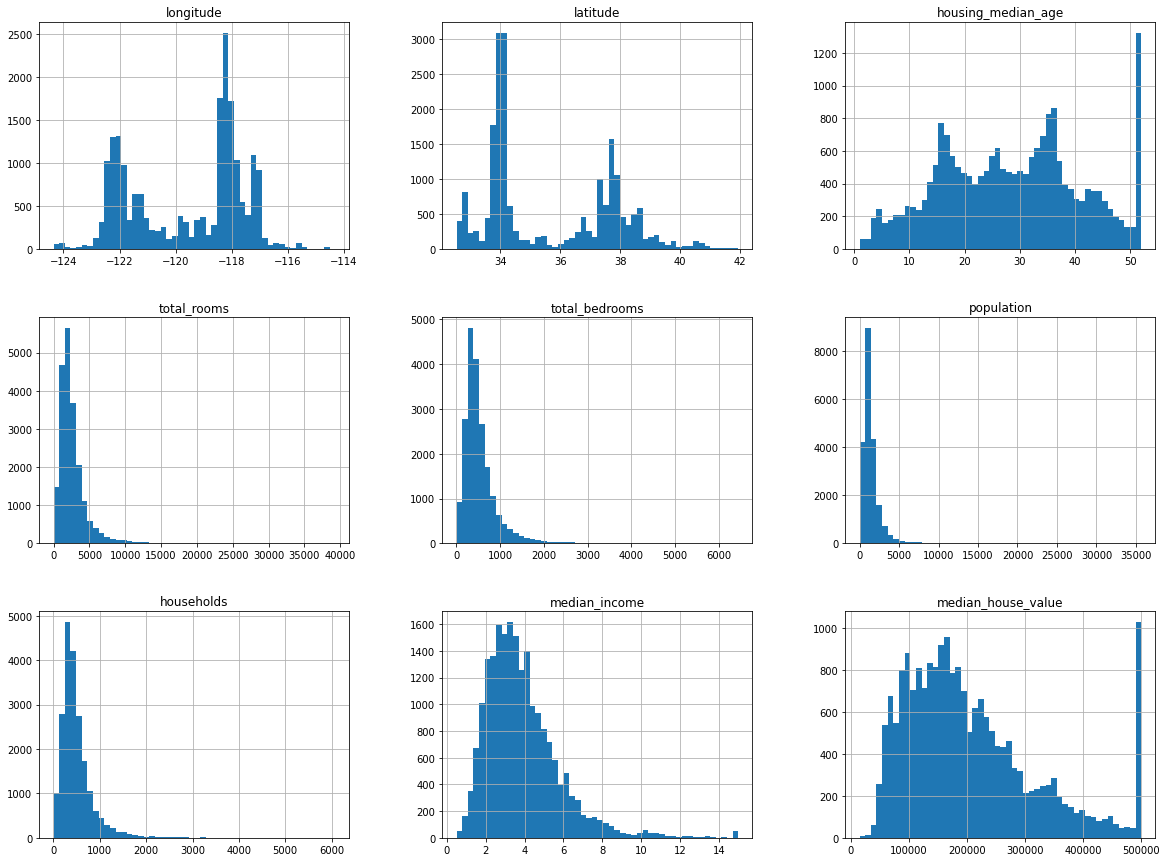

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins =50,figsize=(20,15))
plt.show()

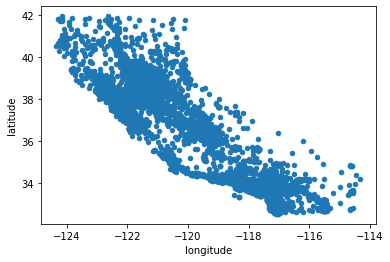

In [ ]:
housing.plot(kind ='scatter',x='longitude',y = 'latitude')
plt.show()

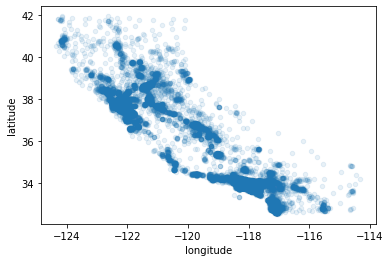

In [ ]:
housing.plot(kind = 'scatter',x = 'longitude',y= 'latitude',alpha=0.1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(len(test_set))
len(train_set)


4128


16512

In [ ]:
housing["income_cat"]  =  pd.cut(housing["median_income"], bins=[0.,  1.5,  3.0,  4.5,  6.,  np.inf], labels=[1,  2,  3,  4,  5])

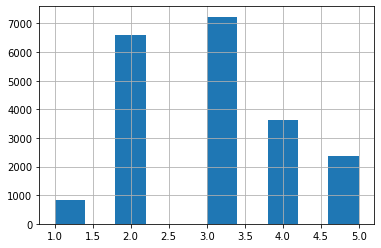

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set =housing.loc[test_index]


In [ ]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

In [ ]:
housing=strat_train_set.copy()

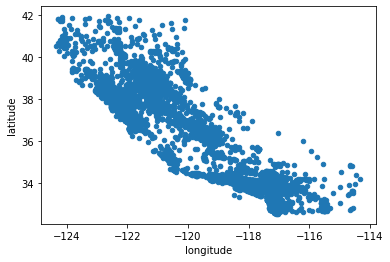

In [ ]:
housing.plot(kind="scatter",  x="longitude",  y="latitude")

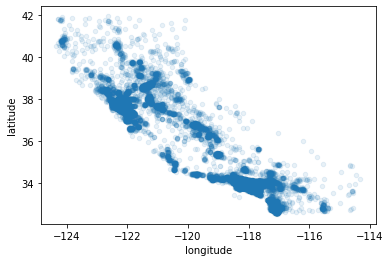

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

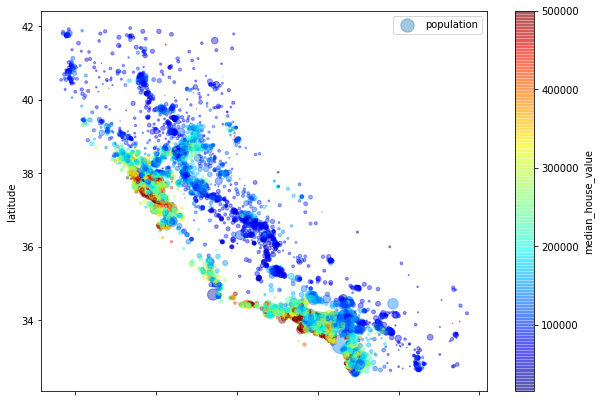

In [ ]:
housing.plot(kind="scatter",  x="longitude",  y="latitude",  alpha=0.4, 
             s=housing["population"]/100,  label="population",  
             figsize=(10,7), c="median_house_value",  
             cmap=plt.get_cmap("jet"),  colorbar=True, ) 
plt.legend()

In [ ]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10b6579668>,
      dtype=object)

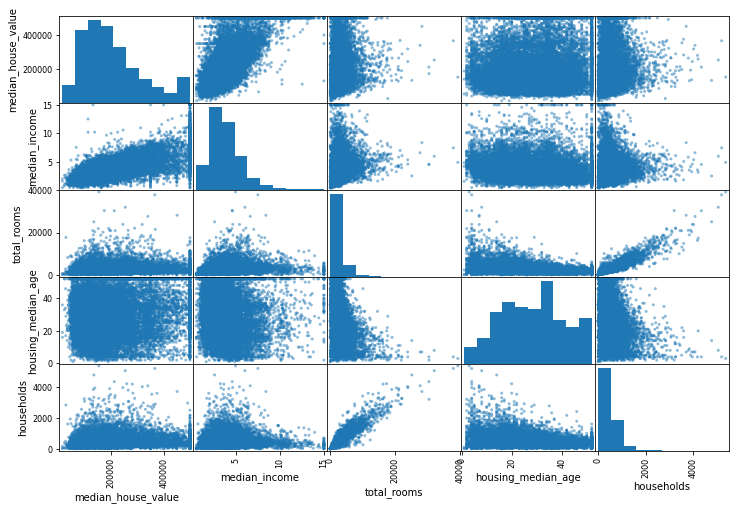

In [ ]:
from pandas.plotting import scatter_matrix
attributes  =  ["median_house_value",  "median_income",  "total_rooms", "housing_median_age","households"]
scatter_matrix(housing[attributes],figsize=(12,8))

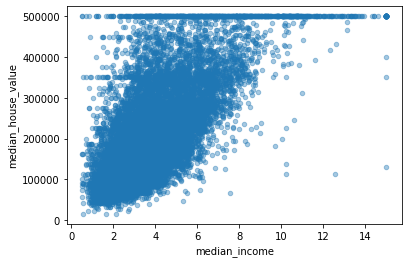

In [ ]:
housing.plot(kind="scatter",x='median_income',y='median_house_value',alpha=0.4)

In [ ]:
housing['rooms_per_houeholds']=housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_households']=housing['population']/housing['households']
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_houeholds          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_rooms          -0.259984
Name: median_house_value, dtype: float64

In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set['median_house_value'].copy()
median=housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)


[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [ ]:
X =imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [ ]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
cat_encoder.categories

'auto'

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix ,bedrooms_ix ,population_ix,households_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def  transform(self,  X,  y=None): 
    rooms_per_household  =  X[:,  rooms_ix]  /  X[:,  households_ix] 
    population_per_household  =  X[:,  population_ix]  /  X[:,  households_ix] 
    if  self.add_bedrooms_per_room: 
      bedrooms_per_room  =  X[:,  bedrooms_ix]  /  X[:,  rooms_ix] 
      return  np.c_[X,  rooms_per_household,  population_per_household, bedrooms_per_room] 
    else: 
      return  np.c_[X,  rooms_per_household,  population_per_household] 
attr_adder  =  CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs  =  attr_adder.transform(housing.values)

In [ ]:
from  sklearn.pipeline  import  Pipeline 
from  sklearn.preprocessing  import  StandardScaler 
num_pipeline  =  Pipeline([ ('imputer',  SimpleImputer(strategy="median")),
                           ('attribs_adder',  CombinedAttributesAdder()), 
                           ('std_scaler',  StandardScaler()), ]) 
housing_num_tr  =  num_pipeline.fit_transform(housing_num)

In [ ]:
from  sklearn.compose  import  ColumnTransformer 
num_attribs  =  list(housing_num) 
cat_attribs  =  ["ocean_proximity"] 
full_pipeline  =  ColumnTransformer([ ("num",  num_pipeline,  num_attribs), 
                                     ("cat",  OneHotEncoder(),  cat_attribs), ]) 
housing_prepared  =  full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.fit_transform(some_data)
#print("prediction:",lin_reg.predict(some_data_prepared))
print("labels:",list(some_labels))


labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_prediction=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,
                       housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)
forest_rmse_scores=np.sqrt(-scores)
def display_scores(scores):
  print("scores:",scores)
  print("mean:",scores.mean())
  print("std:",scores.std())
display_scores(tree_rmse_scores)

scores: [68222.28731487 65552.81587152 72013.92190452 68783.818946
 71972.49244488 76477.77672113 69149.29130151 71201.56404543
 75693.62859245 69359.57151797]
mean: 70842.71686602713
std: 3197.1597398681606


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_prediction=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_prediction)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18692.52266568058

In [ ]:
forest_rmse_scores=np.sqrt(-scores)
display_scores(forest_rmse_scores)

scores: [68222.28731487 65552.81587152 72013.92190452 68783.818946
 71972.49244488 76477.77672113 69149.29130151 71201.56404543
 75693.62859245 69359.57151797]
mean: 70842.71686602713
std: 3197.1597398681606


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= [
            {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cvrs=grid_search.cv_results_
for mean_score,params in zip(cvrs["mean_test_score"],cvrs['params']):
  print(np.sqrt(-mean_score),params)

63263.31848001399 {'max_features': 2, 'n_estimators': 3}
55293.0843975957 {'max_features': 2, 'n_estimators': 10}
52911.90158151185 {'max_features': 2, 'n_estimators': 30}
60260.1560898344 {'max_features': 4, 'n_estimators': 3}
52667.51584171362 {'max_features': 4, 'n_estimators': 10}
50405.54086022104 {'max_features': 4, 'n_estimators': 30}
58903.39530833012 {'max_features': 6, 'n_estimators': 3}
52375.16648684854 {'max_features': 6, 'n_estimators': 10}
50099.82534394207 {'max_features': 6, 'n_estimators': 30}
58828.13215745088 {'max_features': 8, 'n_estimators': 3}
51892.79713670446 {'max_features': 8, 'n_estimators': 10}
50038.02071006439 {'max_features': 8, 'n_estimators': 30}
61945.05298616636 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54004.72110817532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60005.916020158686 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52605.74666481286 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076452,0.002162,0.005483,0.000382,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.065827e+09,-3.925431e+09,-4.108437e+09,-3.872754e+09,-4.038788e+09,-4.002247e+09,8.868278e+07,18
1,0.251201,0.005334,0.014101,0.000305,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.830717e+09,-3.018201e+09,-3.296107e+09,-2.890409e+09,-3.251191e+09,-3.057325e+09,1.872665e+08,11
2,0.751418,0.005933,0.038748,0.000598,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.617154e+09,-2.832309e+09,-2.883344e+09,-2.688447e+09,-2.977093e+09,-2.799669e+09,1.305589e+08,9
3,0.123729,0.004310,0.005303,0.000111,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.636087e+09,-3.814468e+09,-3.671375e+09,-3.331585e+09,-3.702918e+09,-3.631286e+09,1.613305e+08,16
4,0.403512,0.003368,0.014033,0.000250,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.572119e+09,-2.758518e+09,-3.014246e+09,-2.682754e+09,-2.841699e+09,-2.773867e+09,1.494140e+08,8
5,1.207607,0.011738,0.040449,0.003154,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.391663e+09,-2.607787e+09,-2.651843e+09,-2.401696e+09,-2.650604e+09,-2.540719e+09,1.187150e+08,3
6,0.170998,0.004132,0.005458,0.000132,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.117899e+09,-3.497491e+09,-3.887535e+09,-3.219054e+09,-3.626071e+09,-3.469610e+09,2.779919e+08,14
7,0.557549,0.003793,0.014201,0.000425,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.563547e+09,-2.839013e+09,-2.887876e+09,-2.531207e+09,-2.894148e+09,-2.743158e+09,1.613151e+08,6
8,1.691287,0.011472,0.038385,0.000834,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.398734e+09,-2.588840e+09,-2.604945e+09,-2.306264e+09,-2.651180e+09,-2.509992e+09,1.334543e+08,2
9,0.217758,0.003636,0.005287,0.000096,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.344702e+09,-3.559504e+09,-3.611045e+09,-3.074545e+09,-3.713950e+09,-3.460749e+09,2.276282e+08,13


In [ ]:
feature_importances=grid_search.best_estimator_.feature_importances_

In [ ]:
feature_importances

array([6.75033486e-02, 6.47597737e-02, 4.50577311e-02, 1.51048501e-02,
       1.48389118e-02, 1.48646392e-02, 1.36637070e-02, 3.76396082e-01,
       5.57456016e-02, 1.14447010e-01, 6.05758587e-02, 1.20461632e-02,
       1.35197804e-01, 5.99821261e-05, 2.93098458e-03, 6.80755278e-03])

In [ ]:
extra_attribs=["rooms_per_hhold",  "pop_per_hhold",  "bedrooms_per_room"]

In [ ]:
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3763960815924733, 'median_income'),
 (0.13519780441510768, 'INLAND'),
 (0.11444700966149875, 'pop_per_hhold'),
 (0.0675033485588767, 'longitude'),
 (0.0647597736552303, 'latitude'),
 (0.06057585866588063, 'bedrooms_per_room'),
 (0.05574560155158003, 'rooms_per_hhold'),
 (0.04505773107871922, 'housing_median_age'),
 (0.015104850081091359, 'total_rooms'),
 (0.014864639229933923, 'population'),
 (0.014838911823918367, 'total_bedrooms'),
 (0.013663706996753198, 'households'),
 (0.01204616320105796, '<1H OCEAN'),
 (5.99821261304379e-05, 'NEAR OCEAN')]

In [ ]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()
#X_test_prepared=full_pipeline.transform(X_test)
final_predictons=final_model.predict(X_test_prepared)
fimal_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)


ValueError: ignored

In [ ]:
final_rmse

NameError: ignored